In [157]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [161]:
# Membaca dataset
data = pd.read_csv('uber.csv')
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [162]:
# Menghapus kolom Unnamed: 0
data = data.drop('Unnamed: 0', axis=1)

In [163]:
# Mengkonversi kolom pickup_datetime ke format datetime
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

# Membuat kolom baru pickup_date dan pickup_time
data['pickup_date'] = data['pickup_datetime'].dt.date
data['pickup_time'] = data['pickup_datetime'].dt.time

# Menampilkan 5 baris pertama dari dataset untuk memastikan perubahan
print(data.head())

                             key  fare_amount           pickup_datetime  \
0    2015-05-07 19:52:06.0000003          7.5 2015-05-07 19:52:06+00:00   
1    2009-07-17 20:04:56.0000002          7.7 2009-07-17 20:04:56+00:00   
2   2009-08-24 21:45:00.00000061         12.9 2009-08-24 21:45:00+00:00   
3    2009-06-26 08:22:21.0000001          5.3 2009-06-26 08:22:21+00:00   
4  2014-08-28 17:47:00.000000188         16.0 2014-08-28 17:47:00+00:00   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.999817        40.738354         -73.999512         40.723217   
1        -73.994355        40.728225         -73.994710         40.750325   
2        -74.005043        40.740770         -73.962565         40.772647   
3        -73.976124        40.790844         -73.965316         40.803349   
4        -73.925023        40.744085         -73.973082         40.761247   

   passenger_count pickup_date pickup_time  
0                1  2015-05-07    19:52:0

In [164]:
# Informasi dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   key                200000 non-null  object             
 1   fare_amount        200000 non-null  float64            
 2   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 3   pickup_longitude   200000 non-null  float64            
 4   pickup_latitude    200000 non-null  float64            
 5   dropoff_longitude  199999 non-null  float64            
 6   dropoff_latitude   199999 non-null  float64            
 7   passenger_count    200000 non-null  int64              
 8   pickup_date        200000 non-null  object             
 9   pickup_time        200000 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(3)
memory usage: 15.3+ MB
None


In [165]:
# Statistik deskriptif
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [166]:
data.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'pickup_date', 'pickup_time'],
      dtype='object')

In [167]:
data = data.assign(hour = data.pickup_datetime .dt.hour,
                   day = data.pickup_datetime .dt.day,
                   month = data.pickup_datetime .dt.month,
                   year = data.pickup_datetime .dt.year,
                   dayofweek = data.pickup_datetime .dt.dayofweek,
                   pickup_day = data.pickup_datetime .dt.day_name()
                   )

In [168]:
import numpy as np

def haversine(lon1, lat1, lon2, lat2):
    # Radius Bumi dalam kilometer
    R = 6371.0

    # Konversi derajat ke radian
    lon1_rad = np.radians(lon1)
    lat1_rad = np.radians(lat1)
    lon2_rad = np.radians(lon2)
    lat2_rad = np.radians(lat2)

    # Perbedaan koordinat
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad

    # Rumus Haversine
    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    # Jarak dalam kilometer
    distance = R * c
    
    return distance


In [169]:
# Hitung jarak dan tambahkan kolom baru
data['distance'] = haversine(data['pickup_longitude'], data['pickup_latitude'],
                             data['dropoff_longitude'], data['dropoff_latitude'])

#round it to decimal points
data['distance'] = data['distance'].astype(float).round(2)
# Menampilkan 5 baris pertama untuk memastikan perubahan
data.head()


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_time,hour,day,month,year,dayofweek,pickup_day,distance
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,19:52:06,19,7,5,2015,3,Thursday,1.68
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17,20:04:56,20,17,7,2009,4,Friday,2.46
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24,21:45:00,21,24,8,2009,0,Monday,5.04
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26,08:22:21,8,26,6,2009,4,Friday,1.66
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28,17:47:00,17,28,8,2014,3,Thursday,4.48


In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   key                200000 non-null  object             
 1   fare_amount        200000 non-null  float64            
 2   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 3   pickup_longitude   200000 non-null  float64            
 4   pickup_latitude    200000 non-null  float64            
 5   dropoff_longitude  199999 non-null  float64            
 6   dropoff_latitude   199999 non-null  float64            
 7   passenger_count    200000 non-null  int64              
 8   pickup_date        200000 non-null  object             
 9   pickup_time        200000 non-null  object             
 10  hour               200000 non-null  int32              
 11  day                200000 non-null  int32              
 12  month              200000 non-

In [171]:
# Check Missing values data
data.isna().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
pickup_date          0
pickup_time          0
hour                 0
day                  0
month                0
year                 0
dayofweek            0
pickup_day           0
distance             1
dtype: int64

In [172]:
rows_with_missing = data[data.isnull().any(axis=1)]
rows_with_missing.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_time,hour,day,month,year,dayofweek,pickup_day,distance
87946,2013-07-02 03:51:57.0000001,24.1,2013-07-02 03:51:57+00:00,-73.950581,40.779692,NaN,NaN,0,2013-07-02,03:51:57,3,2,7,2013,1,Tuesday,NaN


In [173]:
data['dropoff_latitude'].fillna(value=data['dropoff_latitude'].mean(),inplace = True)
data['dropoff_longitude'].fillna(value=data['dropoff_longitude'].median(),inplace = True)
data['distance'].fillna(value=data['distance'].mean(),inplace = True)
# Verify that there are no more missing values
print(data.isnull().sum())

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
pickup_date          0
pickup_time          0
hour                 0
day                  0
month                0
year                 0
dayofweek            0
pickup_day           0
distance             0
dtype: int64


c:\Users\asus\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


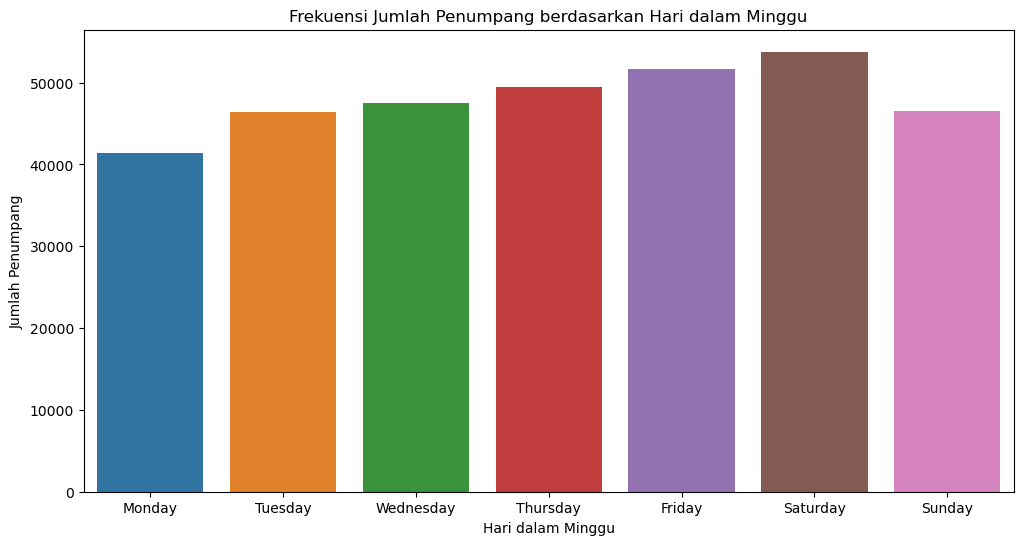

In [174]:
# Menghitung total frekuensi passenger_count per hari
daily_passenger_count = data.groupby('pickup_day')['passenger_count'].sum().reset_index()

# Mengurutkan hari dalam minggu sesuai urutan kalender
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_passenger_count['pickup_day'] = pd.Categorical(daily_passenger_count['pickup_day'], categories=days_order, ordered=True)
daily_passenger_count = daily_passenger_count.sort_values('pickup_day')

# Membuat diagram batang
plt.figure(figsize=(12, 6))
sns.barplot(x='pickup_day', y='passenger_count', data=daily_passenger_count)
plt.title('Frekuensi Jumlah Penumpang berdasarkan Hari dalam Minggu')
plt.xlabel('Hari dalam Minggu')
plt.ylabel('Jumlah Penumpang')
plt.show()

In [175]:
from sklearn.preprocessing import StandardScaler

# Fitur numerik yang akan di-skala
numerical_features = ['fare_amount', 'pickup_longitude', 'pickup_latitude', 
                       'dropoff_longitude', 'dropoff_latitude']

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Terapkan skalasi pada fitur numerik
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Menampilkan 5 baris pertama untuk memastikan skalasi
data.head()


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_time,hour,day,month,year,dayofweek,pickup_day,distance
0,2015-05-07 19:52:06.0000003,-0.389826,2015-05-07 19:52:06+00:00,-0.128712,0.103940,-0.112387,0.117638,1,2015-05-07,19:52:06,19,7,5,2015,3,Thursday,1.68
1,2009-07-17 20:04:56.0000002,-0.369627,2009-07-17 20:04:56+00:00,-0.128235,0.102628,-0.112020,0.121628,1,2009-07-17,20:04:56,20,17,7,2009,4,Friday,2.46
2,2009-08-24 21:45:00.00000061,0.155533,2009-08-24 21:45:00+00:00,-0.129169,0.104253,-0.109570,0.124913,1,2009-08-24,21:45:00,21,24,8,2009,0,Monday,5.04
3,2009-06-26 08:22:21.0000001,-0.612008,2009-06-26 08:22:21+00:00,-0.126641,0.110738,-0.109780,0.129431,3,2009-06-26,08:22:21,8,26,6,2009,4,Friday,1.66
4,2014-08-28 17:47:00.000000188,0.468608,2014-08-28 17:47:00+00:00,-0.122173,0.104682,-0.110372,0.123235,5,2014-08-28,17:47:00,17,28,8,2014,3,Thursday,4.48


In [177]:
# Menghitung statistik deskriptif setelah scaling
data[numerical_features].describe()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05
mean,-2.313527e-16,6.460255e-16,-1.489431e-15,-3.387868e-16,-6.505019e-17
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-6.398863e+00,-1.108714e+02,-1.475955e+01,-2.503663e+02,-1.356788e+02
25%,-5.413139e-01,-1.280344e-01,1.034788e-01,-1.117687e-01,1.191990e-01
50%,-2.888333e-01,-1.271390e-01,1.057839e-01,-1.109062e-01,1.220275e-01
75%,1.151357e-01,-1.258564e-01,1.076705e-01,-1.096533e-01,1.242290e-01
max,4.924786e+01,1.136115e+01,2.078209e+02,9.347152e+01,1.225605e+02


In [179]:
data.shape #200.000 baris dan 17 kolom

(200000, 17)

In [191]:
from sklearn.model_selection import train_test_split

# Memilih kolom fitur dan target
X = data[['passenger_count', 'hour', 'day', 
          'month', 'year', 'dayofweek', 'distance']]
y = data['fare_amount']

# Membagi data menjadi data latih dan data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [192]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Inisialisasi model
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42)


In [195]:
# Melatih model
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [206]:
from sklearn.metrics import classification_report, confusion_matrix
# Membuat prediksi
y_pred_lr = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)

In [198]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse**0.5
    r2 = r2_score(y_true, y_pred)
    
    print(f"{model_name} Performance:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.2f}")
    print()

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")

Linear Regression Performance:
MAE: 0.61
MSE: 1.07
RMSE: 1.03
R²: 0.02

Decision Tree Performance:
MAE: 0.33
MSE: 0.61
RMSE: 0.78
R²: 0.44

Random Forest Performance:
MAE: 0.25
MSE: 0.35
RMSE: 0.59
R²: 0.68



<Figure size 1200x800 with 0 Axes>

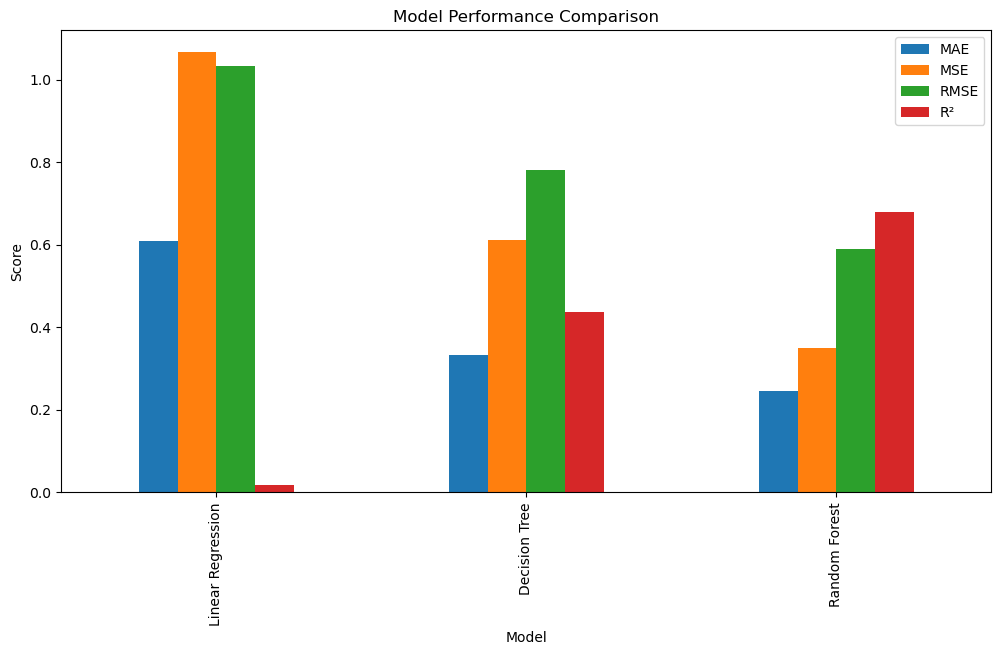

In [201]:
#Visualisasi perbandingan model
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung hasil evaluasi
results = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'MAE': [mean_absolute_error(y_test, y_pred_lr), mean_absolute_error(y_test, y_pred_dt), mean_absolute_error(y_test, y_pred_rf)],
    'MSE': [mean_squared_error(y_test, y_pred_lr), mean_squared_error(y_test, y_pred_dt), mean_squared_error(y_test, y_pred_rf)],
    'RMSE': [mean_squared_error(y_test, y_pred_lr)**0.5, mean_squared_error(y_test, y_pred_dt)**0.5, mean_squared_error(y_test, y_pred_rf)**0.5],
    'R²': [r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_dt), r2_score(y_test, y_pred_rf)]
}

results_df = pd.DataFrame(results)
results_df.set_index('Model', inplace=True)

# Plot
plt.figure(figsize=(12, 8))
results_df.plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.show()


In [202]:
from sklearn.model_selection import cross_val_score

def cross_validate_model(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
    mse_scores = -scores
    return mse_scores.mean(), mse_scores.std()

# Evaluasi cross-validation
cv_results_lr = cross_validate_model(lr, X, y)
cv_results_dt = cross_validate_model(dt, X, y)
cv_results_rf = cross_validate_model(rf, X, y)

print(f"Linear Regression CV - Mean MSE: {cv_results_lr[0]:.2f}, Std: {cv_results_lr[1]:.2f}")
print(f"Decision Tree CV - Mean MSE: {cv_results_dt[0]:.2f}, Std: {cv_results_dt[1]:.2f}")
print(f"Random Forest CV - Mean MSE: {cv_results_rf[0]:.2f}, Std: {cv_results_rf[1]:.2f}")


Linear Regression CV - Mean MSE: 0.98, Std: 0.04
Decision Tree CV - Mean MSE: 0.57, Std: 0.05
Random Forest CV - Mean MSE: 0.28, Std: 0.03


In [ ]:
import joblib

# Simpan model Random Forest
joblib.dump(rf, 'random_forest_model.sav')